In [116]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [117]:
df = pd.read_csv("focus.csv")

In [118]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
1,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
2,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
3,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0


In [119]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_14012\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.757567,-0.789105,0.306008,0.060865,-0.219975
price,0.757567,1.000000,-0.726530,0.467824,-0.287476,0.206305
mileage,-0.789105,-0.726530,1.000000,-0.374934,0.119685,0.211660
tax,0.306008,0.467824,-0.374934,1.000000,-0.506276,0.034416
mpg,0.060865,-0.287476,0.119685,-0.506276,1.000000,-0.118940
engineSize,-0.219975,0.206305,0.211660,0.034416,-0.118940,1.000000


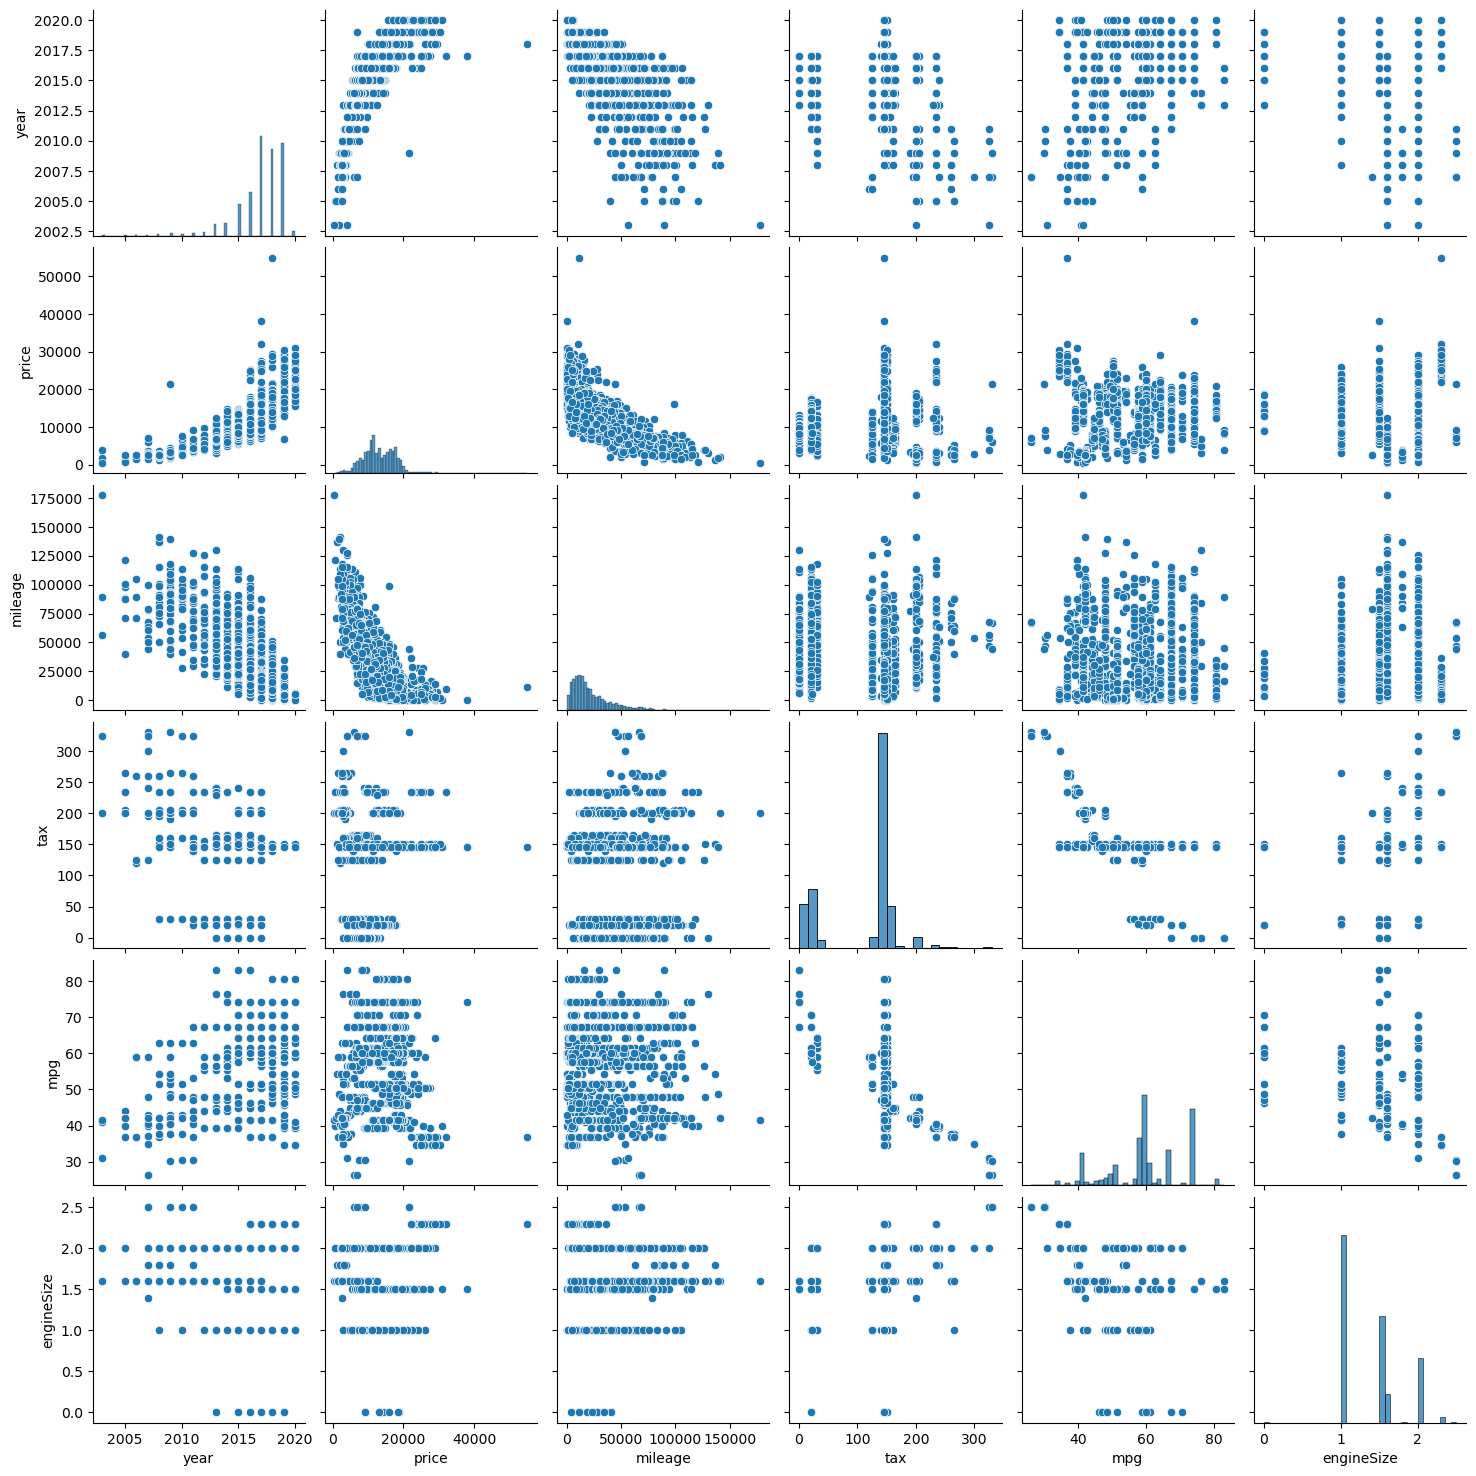

In [120]:
sns.pairplot(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_14012\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

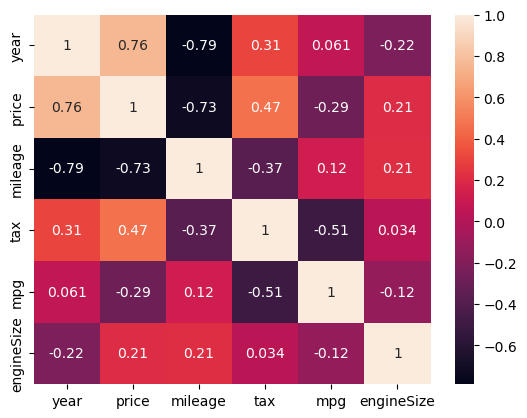

In [121]:
sns.heatmap(df.corr(),annot=True)

In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
X= df.drop("price" ,axis=1)
y=df["price"]

In [124]:
from sklearn.preprocessing import LabelEncoder

# Label encoding örneği
# Sayısal veri ya
le = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

In [125]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2018,1,9083,1,150,57.7,1.0
1,0,2017,1,12456,1,150,57.7,1.0
2,0,2018,1,48141,1,145,61.4,1.0
3,0,2017,1,13063,1,145,41.5,2.0
4,0,2019,1,8400,1,145,60.1,1.0


In [126]:
model = PolynomialFeatures(degree=3,include_bias=False)

In [127]:
poly_feat = model.fit_transform(X)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [129]:
model_poly = LinearRegression(fit_intercept=True)


In [130]:
model_poly.fit(X_train,y_train)

LinearRegression()

In [131]:
pred = model_poly.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [133]:
print("R^2 :       ", round(r2_score(y_test,pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,pred)),2))

R^2 :        0.89
MAE :        949.69
RMSE :       1525.97
